In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [3]:
train_data['source'] = 'train'
test_data['source'] = 'test'
data = pd.concat([train_data, test_data], ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [5]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


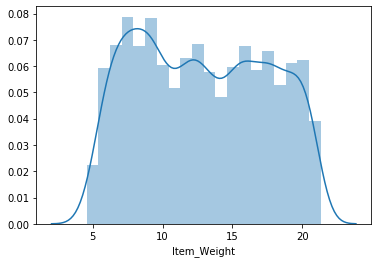

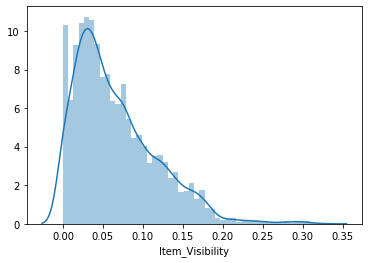

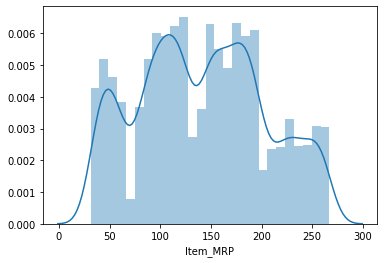

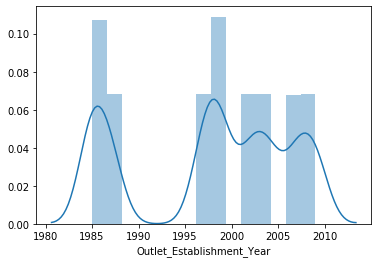

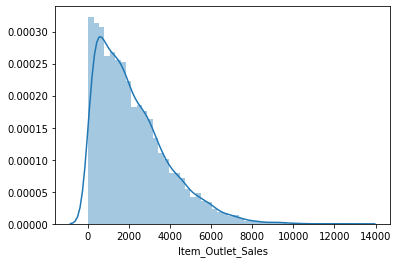

In [8]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

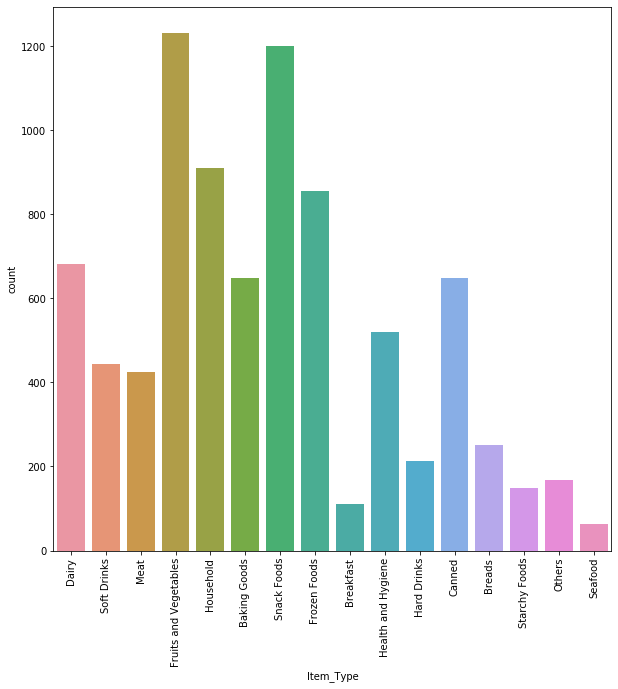

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

In [10]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

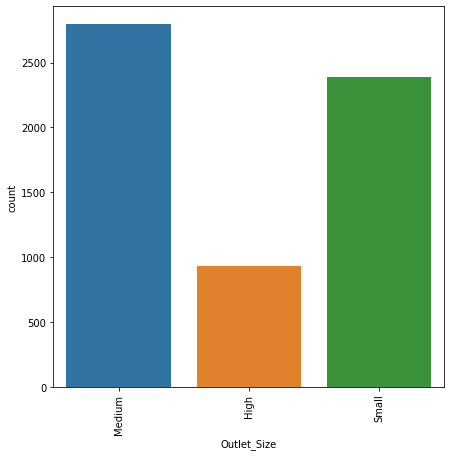

In [11]:
plt.figure(figsize=(7,7))
sns.countplot(train_data.Outlet_Size)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

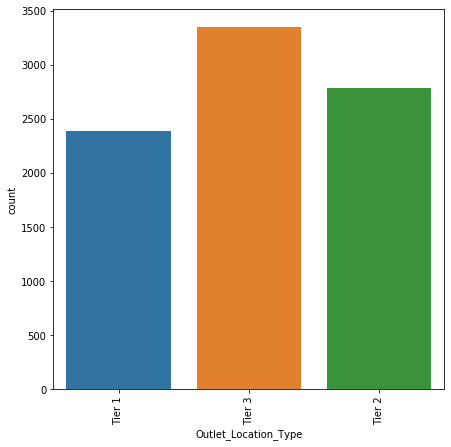

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(train_data.Outlet_Location_Type)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

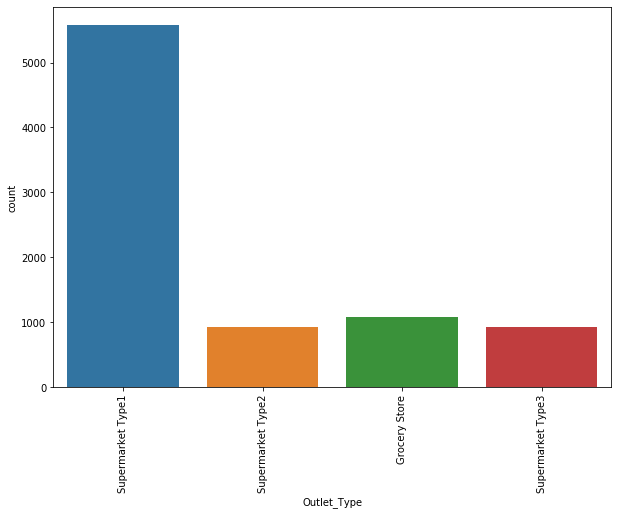

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=90)

In [14]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

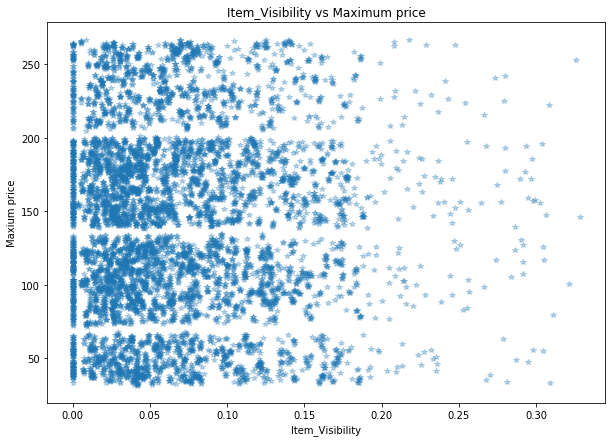

In [15]:
plt.figure(figsize=(10,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Maxium price")
plt.title("Item_Visibility vs Maximum price")
plt.plot(train_data.Item_Visibility,train_data.Item_MRP, "*",alpha=0.3)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

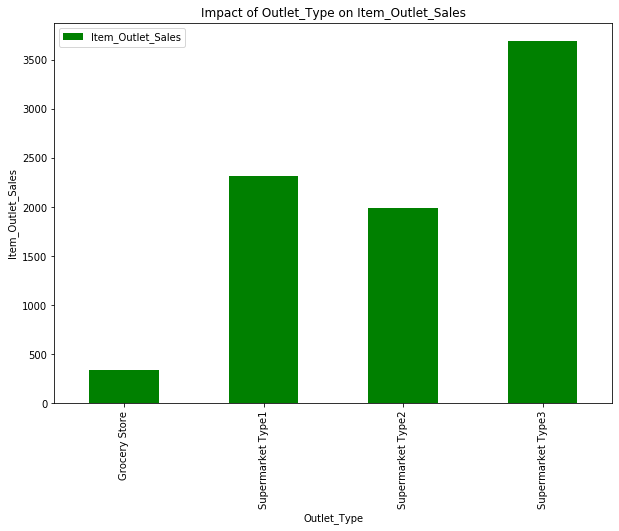

In [16]:
outlet_type = train_data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')
outlet_type.plot(kind='bar',color='green',figsize=(10,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

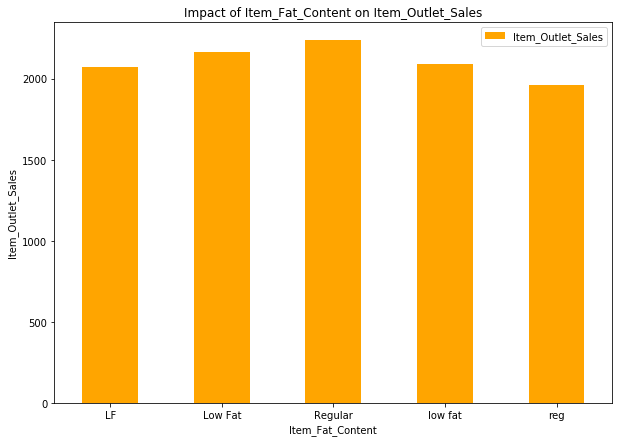

In [17]:
fat_content = train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales')
fat_content.plot(kind='bar',color='orange',figsize=(10,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)

In [18]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [19]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [20]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [21]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [22]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

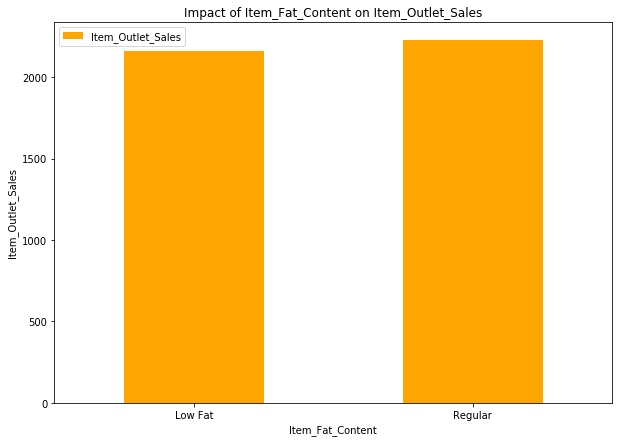

In [23]:
fat_content = train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales')
fat_content.plot(kind='bar',color='orange',figsize=(10,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)

In [24]:
train_data.corr().T

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


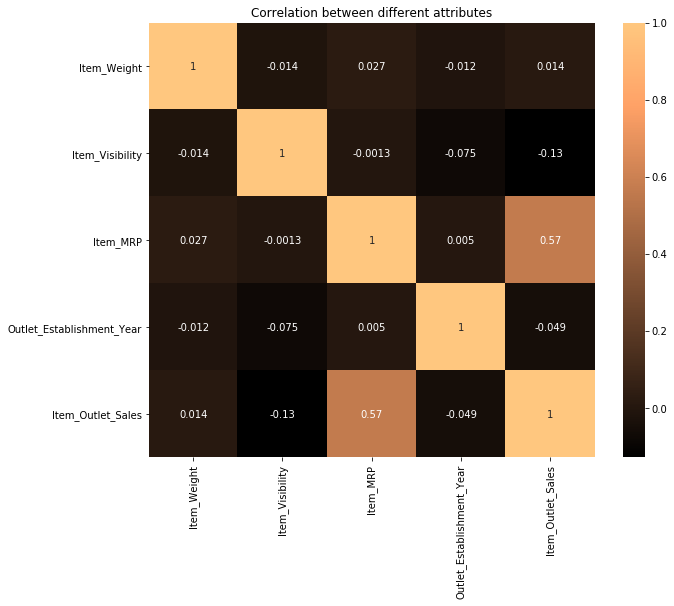

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),vmax=1,annot=True,cmap='copper')
plt.title("Correlation between different attributes")
plt.show()

# Feature_eng:

In [26]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

We can see that we have got missing data in the columns "Item_Weight" and "Outlet_Size" \
Item_Outlet_Sales are coming from test source so lets not worry about that.

In [27]:
# As Item_Weight is a numerical column replacing the NaN value with mean will be a good choice
data['Item_Weight'].mean()

12.792854228644991

In [28]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

# Outlet_Size

In [29]:
# As Outlet_Size is a categorical column we can replace the NaN values with the mode of the column
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [30]:
# Lets replace the NaN values with Medium as it's occuring the most
data['Outlet_Size'].fillna("Medium",inplace=True)

In [31]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Item_Visibility:

We observed that in our data we have few values in the column Item_Visibility whose values is 0. Now value 0 means the item is not available but according to the data it is available. So we need to replace those value with either mean or the median.\
-- Now as this column Item_Visibility is positively skewed replacing the ZERO's with mean will not be good option.

In [32]:
data['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [33]:
# Replacing the ZERO's with NaN
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

In [34]:
# Lets replace the 0's which are now NaN value with the median
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

In [35]:
data['Item_Visibility'].value_counts().head()

0.057851    881
0.077169      3
0.076841      3
0.076483      3
0.077290      3
Name: Item_Visibility, dtype: int64

In [36]:
data['Item_Identifier'].value_counts()

FDM44    10
FDJ26    10
FDB17    10
FDS01    10
FDY35    10
         ..
FDX49     7
FDM50     7
FDM52     7
FDH58     7
FDM10     7
Name: Item_Identifier, Length: 1559, dtype: int64



In the above cell if we notice we can see that all the items are actually distributed into three categories.\
(FD:Food, NC:Non-Consumable, DR:Drinks).\
So lets divide them into these three categories and lets see what we get

In [37]:
data['New_Item_type'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['New_Item_type'] = data['New_Item_type'].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
data['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64



OKAY!\
Now if a product is non-consumable why will we relate them with fat_content

In [38]:
data.loc[data['New_Item_type'] == 'Non-Consumable','Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Non-Edible,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [40]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Type','New_Item_type','Outlet_Location_Type']
for i in variable:
    data[i] = lb.fit_transform(data[i])

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_type
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,1
3,FDX07,19.20,2,0.057851,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,1
4,NCD19,8.93,1,0.057851,Household,53.8614,1,1987,0,2,1,994.7052,train,2


In [42]:
data = pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Type','New_Item_type','Outlet_Location_Type'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Identifier_0            uint8
Outlet_Identifier_1            uint8
Outlet_Identifier_2            uint8
Outlet_Identifier_3            uint8
Outlet_Identifier_4            uint8
Outlet_Identifier_5            uint8
Outlet_Identifier_6            uint8
Outlet_Identifier_7            uint8
Outlet_Identifier_8            uint8
Outlet_Identifier_9            uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
O

In [43]:
data.drop(['Item_Type'],axis=1,inplace=True)

In [44]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [45]:
train.drop(['source'],axis=1,inplace=True)

In [46]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [47]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Identifier_0,...,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_type_0,New_Item_type_1,New_Item_type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,FDX07,19.20,0.057851,182.0950,1998,732.3800,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
4,NCD19,8.93,0.057851,53.8614,1987,994.7052,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [48]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'New_Item_type_0',
       'New_Item_type_1', 'New_Item_type_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2'],
      dtype='object')

In [49]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier'],axis=1).copy()

# Logistic Regression

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,...,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_type_0,New_Item_type_1,New_Item_type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
8523,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8524,8.300000,0.038428,87.3198,2007,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8525,14.600000,0.099575,241.7538,1998,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
8526,7.315000,0.015388,155.0340,2007,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8527,12.792854,0.118599,234.2300,1985,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0.013496,141.3154,1997,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
14200,7.600000,0.142991,169.1448,2009,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
14201,10.000000,0.073529,118.7440,2002,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
14202,15.300000,0.057851,214.6218,2007,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [52]:
lr_pred = lr.predict(X_test)

In [53]:
lr_pred

array([1844.8835976 , 1572.95953758, 1875.07324614, ..., 1810.74389939,
       3544.33187313, 1267.01010871])

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X_train, y_train, scoring='r2', cv=3)
scores 

array([0.56144775, 0.55770681, 0.56495682])

In [55]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.56 (+/- 0.01)


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [57]:
model.predict(X_test)

array([1661.69319608, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3877.31959   , 1240.36730761])

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train, y_train, scoring='r2', cv=3)
scores 

array([0.58136204, 0.57349235, 0.58450503])

In [59]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.58 (+/- 0.01)
